<a href="https://colab.research.google.com/github/nptikiran/Python-program/blob/main/Kag_Hypo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

In [ ]:
np.random.seed(6)

population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

minnesota_ages1 = stats.poisson.rvs(loc=18, mu=30, size=30)
minnesota_ages2 = stats.poisson.rvs(loc=18, mu=10, size=20)
minnesota_ages = np.concatenate((minnesota_ages1, minnesota_ages2))

print(population_ages.mean())
print(minnesota_ages.mean())

43.000112
39.26


In [ ]:
stats.ttest_1samp(a= minnesota_ages,                  # Sample data
                  popmean= population_ages.mean())    # pop mean

Ttest_1sampResult(statistic=-2.5742714883655027, pvalue=0.013118685425061678)

In [ ]:
stats.t.ppf(q=0.025,                                  # Quantile to check
           df= 49)                                    # degree of freedom

-2.0095752344892093

In [ ]:
stats.t.ppf(q = 0.975,                                # Quantile to check
            df= 49)                                   # Degree of freedom

2.009575234489209

In [ ]:
stats.t.cdf(x= -2.57,                                 # above calculated t-statistics
            df = 49 ) * 2                             # multiply by two for two tailed test

0.013261652625859802

In [ ]:
sigma = minnesota_ages.std()/math.sqrt(50)            # sample stdev/sample size
stats.t.interval(0.95,                                # confidence level
                 df = 49,                             # Degree of freedom 
                 loc = minnesota_ages.mean(),         # sample mean
                 scale = sigma)                       # std dev estimate



(36.369669080722176, 42.15033091927782)

In [ ]:
stats.t.interval(alpha = 0.99,                        # confidence level
                 df = 49,                             # Degree of freedom 
                 loc = minnesota_ages.mean(),         # sample mean
                 scale = sigma)                       # std dev estimate

(35.40547994092107, 43.11452005907893)

# Two-Sample Test

In [ ]:
np.random.seed(12)
wisconsin_ages1 = stats.poisson.rvs(loc=18, mu=33, size=30)
wisconsin_ages2 = stats.poisson.rvs(loc=18, mu=13, size=20)
wisconsin_ages = np.concatenate((wisconsin_ages1, wisconsin_ages2))

print(wisconsin_ages.mean())

42.8


In [ ]:
stats.ttest_ind(a= minnesota_ages,
                b= wisconsin_ages,
                equal_var= False)       # Assume sample has equal variance?

Ttest_indResult(statistic=-1.7083870793286842, pvalue=0.09073104343957748)

### Paired T-Test

In [ ]:
np.random.seed(11)

In [ ]:
before = stats.norm.rvs(scale= 30, loc=250, size=100)

after = before + stats.norm.rvs(scale=5, loc=1.25, size=100) 

weight_df = pd.DataFrame({"weight_before":before,
                          "weight_After":after,
                          "weight_change":after-before})
weight_df.describe()                                          #Check summary of data

,weight_before,weight_After,weight_change
count,100.000000,100.000000,100.000000
mean,252.841913,254.686028,1.844115
std,28.976078,28.932384,4.844302
min,180.171537,186.103965,-8.606397
25%,233.174486,236.513277,-1.631197
50%,254.355243,256.426258,2.247237
75%,273.796980,274.558157,5.111778
max,304.457210,306.903453,13.908578


In [ ]:
stats.ttest_rel(a=before,
                b= after)

Ttest_relResult(statistic=-3.8067703112240143, pvalue=0.00024411350695115237)

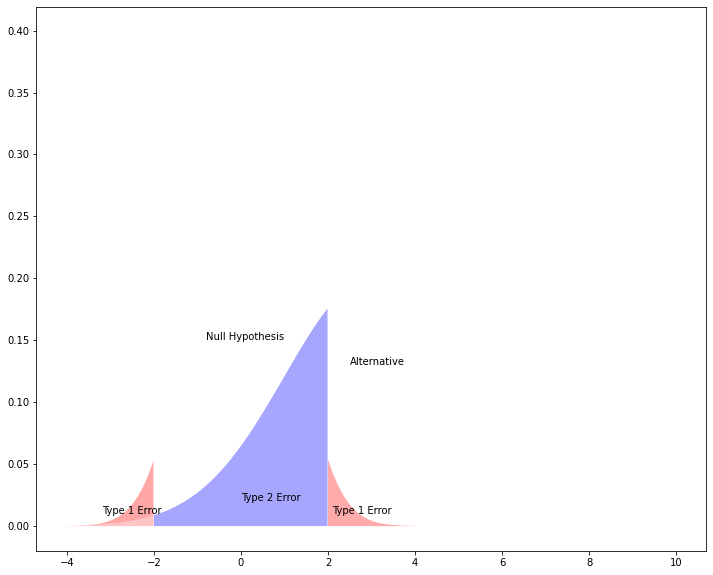

In [ ]:
plt.figure(figsize=(12,10))

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01)) ,
                 facecolor='white',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,4,0.01), 
                 y1= stats.norm.pdf(np.arange(2,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5)

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01),loc=3, scale=2) ,
                 facecolor='white',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01),loc=3, scale=2) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,10,0.01), 
                 y1= stats.norm.pdf(np.arange(2,10,0.01),loc=3, scale=2),
                 facecolor='white',
                 alpha=0.35)

plt.text(x=-0.8, y=0.15, s= "Null Hypothesis")
plt.text(x=2.5, y=0.13, s= "Alternative")
plt.text(x=2.1, y=0.01, s= "Type 1 Error")
plt.text(x=-3.2, y=0.01, s= "Type 1 Error")
plt.text(x=0, y=0.02, s= "Type 2 Error");

In [ ]:
lower_quantile = stats.norm.ppf(0.025) # Lower cutoff value
upper_quantile = stats.norm.ppf(0.975) # upper cutoff value

# Area under alternative, to the left the lower cutoff value 
low = stats.norm.cdf(lower_quantile,
                     loc=3,                     
                     scale=2)

# Area under the alternative, to the left the upper cutoff value
high = stats.norm.cdf(upper_quantile,
                      loc=3,
                      scale=2)

# Area under the alternatives ,between the cutoffs (Type II error)
high-low

0.294956061112323